## Introducción
La retención de clientes es un desafío clave para las empresas de telecomunicaciones, y Interconnect no es la excepción. Para reducir la tasa de cancelación de clientes, la compañía busca implementar un sistema de predicción que identifique con anticipación qué usuarios tienen mayor probabilidad de dar de baja su servicio.

Si se logra detectar a tiempo a estos clientes, Interconnect podrá ofrecer códigos promocionales y planes especiales con el objetivo de mejorar la satisfacción y fomentar la lealtad. Para ello, el equipo de marketing ha recopilado un conjunto de datos que incluye información personal de los clientes, detalles de sus planes y contratos.

Este proyecto tiene como objetivo desarrollar un modelo de Machine Learning capaz de predecir con precisión qué clientes podrían cancelar su contrato. Se analizarán diversos factores que influyen en la decisión de cancelar, y se evaluará el rendimiento de diferentes modelos para encontrar la mejor solución.

### Inicializacion

In [54]:
import pandas as pd 
import numpy as np 

### Carga de Datos

In [55]:
contract_df = pd.read_csv('data/final_provider/contract.csv')
internet_df = pd.read_csv('data/final_provider/internet.csv')
personal_df = pd.read_csv('data/final_provider/personal.csv')
phone_df = pd.read_csv('data/final_provider/phone.csv')

#### Descripcion de Datos

In [56]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [57]:
contract_df['Type'].value_counts()

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

La tabla ***contract_df*** contiene informacion sobre el tipo de contrato asociadoa a cada cliente:

- **customerId**: Numero de identificacion unico para cada cliente.
- **BeginDate**: La fecha desde la cual el cliente contrató algun servicio de la compañia.
- **EndDate**: En caso de que el cliente haya cancelado los servicios la fecha de termino, de lo contrario indica "No".
- **Type**: Indíca el tipo de contrato, si es mes a mes, por 1 año o por 2 años.
- **PaperlessBilling**:  "Yes", Si el cliente recibe facturacion electronica, "No" si recibe la facturacion física (en papel)
- **PaymentMethod**: Metodo de Pago
- **MonthlyCharges**: El monto de cargo mensual.
- **TotalCharges**: Los cargos totales asociados al cliente.

In [58]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


La tabla ***internet_df*** contiene información sobre los servicios de internet contratados por los clientes, incluyendo el tipo de conexión y la disponibilidad de servicios adicionales. Cada servicio está indicado con "Yes" si está contratado o "No" si no lo está.

- **customerID**: Número de identificación único para cada cliente.
- **InternetService**: Tipo de conexión a internet contratado por el cliente. Puede ser DSL (línea de abonado digital) o Fiber optic (fibra óptica).
- **OnlineSecurity**: Servicio de seguridad en línea que protege contra amenazas cibernéticas, como antivirus y firewall.
- **OnlineBackup**: Servicio de almacenamiento en la nube y copia de seguridad de datos.
- **DeviceProtection**: Protección para dispositivos contra malware y sitios web maliciosos.
- **TechSupport**: Acceso a asistencia técnica especializada para resolver problemas de conexión y otros inconvenientes relacionados con el servicio de internet.
- **StreamingTV**: Servicio de transmisión en línea de canales de televisión.
- **StreamingMovies**: Servicio de transmisión en línea de películas y contenido bajo demanda.

In [59]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


La tabla ***personal*** contiene información sobre los datos personales de los clientes.

- **customerID**: Número de identificación único para cada cliente.
- **gender**: Género del cliente, puede ser Female (femenino) o Male (masculino).
- **SeniorCitizen**: Indica si el cliente es un adulto mayor. Toma el valor 1 si lo es y 0 si no lo es.
- **Partner**: Indica si el cliente tiene pareja (Yes para sí, No para no).
- **Dependents**: Indica si el cliente tiene personas a su cargo (Yes para sí, No para no).

In [60]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


La tabla ***phone*** contiene información sobre el servicio de telefonía fija contratado por el cliente.

- **customerID**: Número de identificación único para cada cliente.
- **MultipleLines**: Indica si el cliente tiene un servicio de telefonía fija con capacidad para múltiples líneas (Yes si tiene varias líneas, No si solo tiene una).
Dado que esta tabla describe un servicio específico, podría fusionarse con la tabla **internet** si se desea un análisis conjunto de los servicios contratados.

El dataframe ***contract*** es probablemente el más relevante para el análisis, ya que contiene información clave sobre la antigüedad de los clientes, el objetivo del análisis (es decir, si han cancelado o no el servicio), el tipo de contrato (mensual o anual), el monto de facturación y el método de pago. Estos factores son cruciales para entender los patrones de cancelación y podrían ayudar a identificar qué tipo de contrato o condiciones de pago están más relacionadas con la retención de clientes.

Además, será importante explorar la relación entre el tipo de servicio contratado (***internet***) y la tasa de cancelación, ya que la calidad o características específicas de ciertos servicios podrían influir en la decisión de los clientes de cancelar. La información en ***phone*** también corresponde a un servicio contratado, por lo que fusionar ambos datasets sería una opción óptima para un análisis más completo.

En cuanto al dataset ***personal***, aunque podría parecer inicialmente menos relevante, algunos factores podrían tener una correlación indirecta con la tasa de cancelación. Por ejemplo, la situación familiar del cliente (tener dependientes o pareja) podría influir en su decisión de mantener o cancelar el servicio. Sin embargo, estos son factores que no están bajo el control directo de la empresa, lo que limita las estrategias de intervención basadas en esta información.

#### Procesamiento de datos.
Las columnas de los datasets cargados están con escritas en *CamelCase* en su mayoria o simplemente hay incogruencias, algunas están en minúsculas y otras en mayúsculas. Para prevenir errores, se renombraran las columnas con *snake_case*.

In [61]:
import re

def rename_cols(data):
    # Renombrar columnas de CamelCase a snake_case
    new_columns = []
    for column in data.columns:
        snake_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column).lower()
        new_columns.append(snake_name)
    data.columns = new_columns
    return data.info()

In [62]:
print('Contrato')
print('-'*40)
rename_cols(contract_df)

Contrato
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [63]:
print('Internet')
print('-'*40)
rename_cols(internet_df)

Internet
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [64]:
internet_df['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

In [65]:
print('Personal')
print('-'*40)
rename_cols(personal_df)

Personal
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [66]:
print('Phone')
print('-'*40)
rename_cols(phone_df)

Phone
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [67]:
# Verificar datos duplicados
duplication = contract_df.duplicated().sum()
duplication += personal_df.duplicated().sum()
duplication += phone_df.duplicated().sum()
duplication += internet_df.duplicated().sum()
print(duplication)

0


La columna `total_charges`, es de tipo `object`, lo más apropiado será cambiarlo a `float`.

Podria haber valores vacios en esta columna que no se detectarian como tal si se encuentran como ' ' (espacio vacío).

No se encontraron duplicados explicitos o implicitos, de filas o columnas en ninguno de los datasets

La mayoría de las características están en formato `object`, pero aquellas con valores "Yes" o "No" pueden convertirse a `int` (0 y 1) para simplificar la codificación y el entrenamiento de los modelos. Las columnas de tipo `int` o `float` no presentan problemas y pueden mantenerse en su formato original. La columna `total_charges`, es de tipo `object`, lo más apropiado será cambiarlo a `float`.

En el caso de la columna `end_date` en la tabla ***contract***, se categorizará en dos valores: con o sin fecha. Esto permitirá crear una nueva columna `canceled` con valores `0` o `1` para indicar si el cliente canceló el servicio. Esta nueva columna servirá como objetivo para los modelos de **Machine learning**.

Además, las columnas `begin_date` y end_date se convertirán de `object` a `date` para facilitar el análisis de la duración del contrato.

Para analizar cuales son los principales factores de cancelación, es necesario unir la tabla ***contract*** con las demás utilizando `customer_id`, permitiendo así identificar especialmente los casos en los que el contrato ha sido cancelado.
Este dataset cuenta con un total de 7043 registros, esta sera la cantidad de datos disponibles para el entrenamiento, validación y pruebas.

Finalmente, las columnas categóricas con múltiples valores serán codificadas con `OneHotEncoding` para su uso en los modelos de entrenamiento.

In [68]:
# Reemplazar 'No' por valores nulos en 'end_date' para poder cambiar el tipo de dato
contract_df['end_date'].replace('No', np.nan, inplace=True)

In [69]:
personal_df['senior_citizen'].replace({0:'No', 1:'Yes'}, inplace=True)

In [70]:
# Convertir 'begin_date' y 'end_date' a datatime
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'])
contract_df['end_date']= pd.to_datetime(contract_df['end_date'])

In [71]:
# Eliminar caracteres no numéricos como  ',' y espacios
contract_df['total_charges'] = contract_df['total_charges'].replace({',': '', ' ': ''}, regex=True)

# Convertir la columna a float
contract_df['total_charges'] = pd.to_numeric(contract_df['total_charges'], errors='coerce') 

# Ver los valores no convertibles en 'total_charges'
contract_df[contract_df['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


In [72]:
contract_df.describe()

,begin_date,end_date,monthly_charges,total_charges
count,7043,1869,7043.000000,7032.000000
mean,2017-04-30 13:01:50.918642688,2019-11-15 21:31:18.009630976,64.761692,2283.300441
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000,18.800000
25%,2015-06-01 00:00:00,2019-11-01 00:00:00,35.500000,401.450000
50%,2017-09-01 00:00:00,2019-11-01 00:00:00,70.350000,1397.475000
75%,2019-04-01 00:00:00,2019-12-01 00:00:00,89.850000,3794.737500
max,2020-02-01 00:00:00,2020-01-01 00:00:00,118.750000,8684.800000
std,NaN,NaN,30.090047,2266.771362


Los contratos con valores ausentes en la columna `total_charges` corresponden al último mes en que se recolectaron los datos. Dado que `total_charges` refleja el total acumulado pagado por el cliente hasta la fecha, y teniendo en cuenta que estos contratos no tienen un valor en esa columna, se imputará el valor de `monthly_charges` a estos registros. Esto se hace bajo la suposición de que, en el último mes, el cliente pagó exactamente lo mismo que su cuota mensual.

In [73]:
# Reemplaza valores nulos en cargos totales  con el cargo mensual
contract_df['total_charges'].fillna(contract_df['monthly_charges'], inplace=True)

In [74]:
# Crear la columna 'canceled' 
contract_df["canceled"] = contract_df["end_date"].notna().astype(int)
contract_df.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,canceled
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1


### EDA.

#### Duracion del contrato.

c:\Users\Molix.x\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


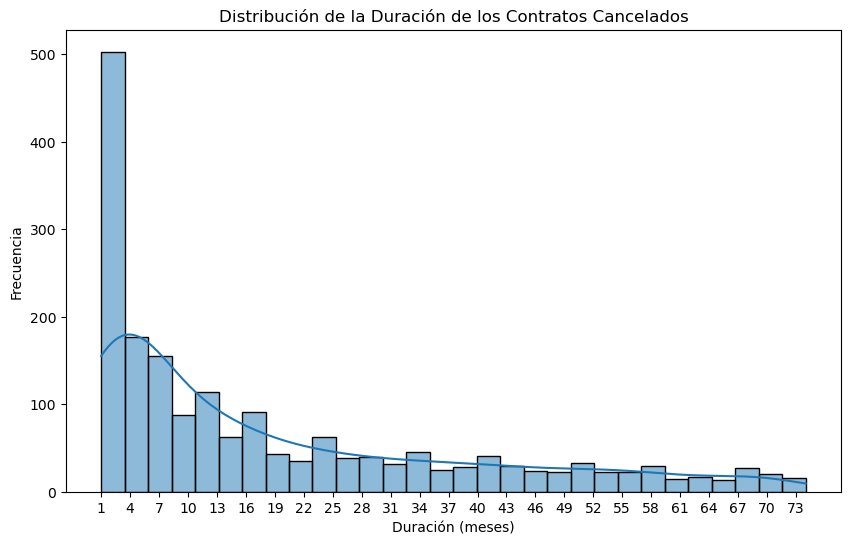

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la última fecha registrada en el dataset
ultima_fecha = contract_df['begin_date'].max()

# Modificar duration_months para que los valores sin end_date usen la última fecha
# Calcula la duracion del contrato en días
contract_df['duration_months'] = (contract_df['end_date'].fillna(ultima_fecha)- contract_df['begin_date']).dt.days
# Convertir duración a meses (redondeando hacia arriba)
contract_df['duration_months'] = contract_df['duration_months'].fillna(0)
contract_df['duration_months'] = np.ceil(contract_df['duration_months'] / 30)

# Filtrar contratos terminados (canceled = 1)
filtered_df = contract_df[contract_df['canceled']==1]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['duration_months'], bins=30, kde=True)
plt.title('Distribución de la Duración de los Contratos Cancelados')
plt.xlabel('Duración (meses)')
plt.ylabel('Frecuencia')

# Ajustar ticks del eje X para facilitar la lectura
plt.xticks(range(int(filtered_df['duration_months'].min()), int(filtered_df['duration_months'].max() + 1), 3))

plt.show()

**Obserbaciones.**
- La mayoría de las cancelaciones ocurren dentro de los primeros 3 meses, lo que sugiere que hay clientes que prueban el servicio por un período corto y deciden no continuar.
- También hay un segundo grupo de cancelaciones frecuentes entre los 4 y 7 meses, aunque con menor frecuencia que el primer pico. Esto podría indicar que algunos clientes permanecen un tiempo más antes de tomar la decisión de cancelar.
- A partir del segundo año (24 meses en adelante), las cancelaciones son menos frecuentes, lo que sugiere que los clientes que superan este umbral tienden a mantenerse en el servicio a largo plazo.

#### Tasa de cancelacion mensual.

In [76]:
# Extraer el mes de cancelacion del contrato
filtered_df = filtered_df.copy() 
filtered_df['month_of_year'] = filtered_df['end_date'].dt.month_name()
cancel_by_month = filtered_df['month_of_year'].value_counts()

# Contar clientes activos por mes
clientes_totales_por_mes = contract_df['begin_date'].dt.month_name().value_counts()

# Calcular tasa de cancelación
tasa_cancelacion_mensual = np.round((cancel_by_month / clientes_totales_por_mes) * 100)
tasa_cancelacion_mensual= tasa_cancelacion_mensual[tasa_cancelacion_mensual.notna()].astype('int')

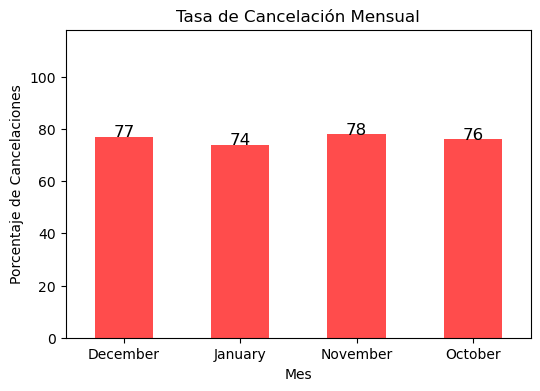

In [77]:
# Crear gráfico de barras
plt.figure(figsize=(6, 4))
ax = tasa_cancelacion_mensual.plot(kind='bar', color='red', alpha=0.7)

# Agregar etiquetas de valores en cada barra
for i, v in enumerate(tasa_cancelacion_mensual):
    ax.text(i, v , str(v), ha='center', fontsize=12)
ax.set_ylim(0, tasa_cancelacion_mensual.max() + 40)

plt.title("Tasa de Cancelación Mensual")
plt.ylabel("Porcentaje de Cancelaciones")
plt.xlabel("Mes")
plt.xticks(rotation=0)
plt.show()

Las cancelaciones de los servicios se concentran exclusivamente entre los meses de octubre y enero, con noviembre registrando el mayor número de bajas. No se observan cancelaciones en otros períodos del año, lo que indica una fuerte estacionalidad en la pérdida de clientes.

Durante estos meses, la tasa de cancelación supera el 70% del total de contrataciones. En noviembre, por cada 100 clientes que contratan los servicios, aproximadamente 78 los cancelan. En octubre, diciembre y enero, las tasas de cancelación también son elevadas, con un 76%, 77% y 74%, respectivamente.

Este patrón podría estar relacionado con factores como la finalización de promociones, ajustes en presupuestos personales por las festividades de fin de año o renovaciones de contratos. Dado que las cancelaciones se concentran en este período, sería recomendable implementar estrategias específicas para mejorar la retención de clientes, como promociones especiales, descuentos por permanencia o mejoras en la experiencia del servicio antes y durante estos meses críticos.

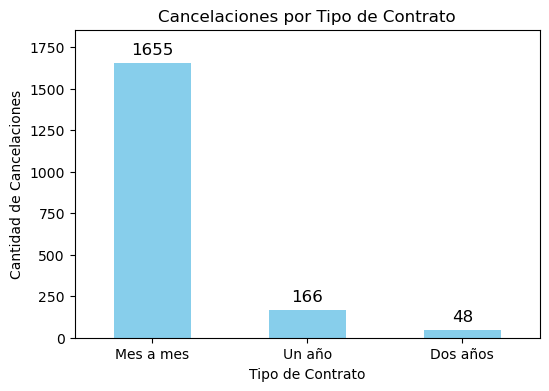

In [78]:
canceled_contract_df = contract_df[contract_df['canceled'] == 1]

# Agrupar por tipo de contrato y contar cancelaciones
cancel_count_by_type = canceled_contract_df.groupby('type').count()['canceled']
labels = ['Mes a mes', 'Un año', 'Dos años']
# Crear gráfico de barras
plt.figure(figsize=(6, 4))
ax = cancel_count_by_type.plot(kind='bar', color='skyblue')

# Agregar etiquetas de valores en cada barra
for i, v in enumerate(cancel_count_by_type):
    ax.text(i, v + 50, str(v), ha='center', fontsize=12)
ax.set_ylim(0, cancel_count_by_type.max() + 200)  

plt.title('Cancelaciones por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()


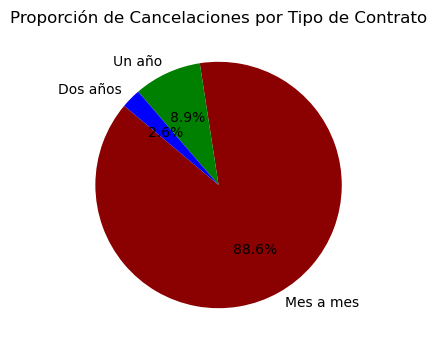

In [79]:
perc_cancel_monthly = (cancel_count_by_type.loc['Month-to-month']/cancel_count_by_type.sum())*100
perc_cancel_1_year = (cancel_count_by_type.loc['One year']/cancel_count_by_type.sum())*100
perc_cancel_2_year = (cancel_count_by_type.loc['Two year']/cancel_count_by_type.sum())*100
cancel_perc = [perc_cancel_monthly, perc_cancel_1_year, perc_cancel_2_year]

colors = ['darkred', 'green', 'blue']

plt.figure(figsize=(6, 4))
plt.pie(cancel_perc, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporción de Cancelaciones por Tipo de Contrato')
plt.show()


**Obserevaciones**
Para los contratos de dos años y un año, las tasas de cancelación son del 2.6% y 8.9%, respectivamente.

En contraste, la tasa de cancelación de los contratos "Mes a mes" es 88.6%, significativamente más alta. Esto sugiere que los clientes con este tipo de contrato tienen menos incentivos para mantener el servicio a largo plazo.

**Posibles acciones:**

- Ofrecer descuentos o beneficios adicionales para fomentar la contratación de planes a largo plazo.
- Mejorar la experiencia del servicio y la relación con los clientes para reducir la cancelación en contratos mensuales.

#### Cancelaciones por Servicio de Internet

In [80]:
# Fusionar contract con la tabla internet
contract_services= contract_df.merge(internet_df, on='customer_id', how='left')

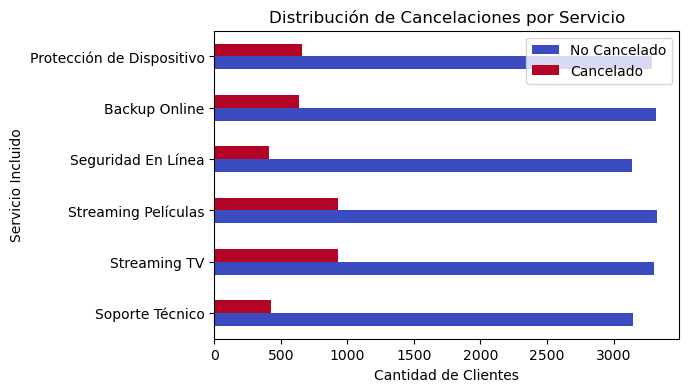

In [81]:
# Seleccionar columnas de interés
service_cols = ['tech_support', 'streaming_tv', 'streaming_movies', 
                'online_security', 'online_backup', 'device_protection']

df_long = contract_services.melt(id_vars=['customer_id', 'canceled'], 
                         value_vars=service_cols, 
                         var_name='service_type', 
                         value_name='status')

# Filtrar solo los servicios contratados
df_long = df_long[df_long['status'] != 'No']

# Contar cancelaciones por tipo de servicio
cancel_counts = df_long.groupby(['service_type', 'canceled']).size().unstack()

# Reordenar las filas de cancel_counts para que coincidan con service_cols
cancel_counts = cancel_counts.reindex(service_cols)

# Etiquetas personalizadas en el mismo orden
services = ['Soporte Técnico', 'Streaming TV', 'Streaming Películas', 
            'Seguridad En Línea', 'Backup Online', 'Protección de Dispositivo']

# Graficar barras 
cancel_counts.plot(kind='barh', figsize=(6,4), colormap='coolwarm')
plt.title('Distribución de Cancelaciones por Servicio')
plt.ylabel('Servicio Incluido')
plt.xlabel('Cantidad de Clientes')
plt.yticks(ticks=range(len(services)), labels=services, rotation=0)
plt.xticks(rotation=0)
plt.legend(['No Cancelado', 'Cancelado'])
plt.show()


Los servicios de *streaming* presentan una tasa de cancelación más alta en comparación con otros servicios de **internet**, con más de 750 clientes que los han dado de baja.

Los servicios de *Protección de Dispositivo* y *Respaldo en la Nube* tienen niveles de contratación similares a los de *streaming*, pero su tasa de cancelación es menor, con aproximadamente 500 clientes que han cancelado estos servicios.

Por otro lado, los servicios de *Soporte Técnico* y *Seguridad en Línea* son los menos contratados, siendo este último el de menor demanda. Sin embargo, también registran la menor cantidad de cancelaciones.

En general, no se observan anomalías evidentes en los datos. A pesar de las diferencias en las cifras de contratación y cancelación entre los servicios, estas son proporcionales: los servicios más contratados también presentan más cancelaciones. Sin embargo, en el caso de los servicios de *streaming*, la tasa de cancelación alcanza casi un tercio del total de clientes que contrataron el servicio.

Dado que los servicios de *streaming* tienen una tasa de cancelación relativamente alta, podría ser útil analizar las razones detrás de esta tendencia e implementar estrategias para mejorar la retención de clientes en este segmento.

#### Cancelaciones por tipo de Conexión

In [82]:
# Fusiona los datasets contract_services y phone
contract_services = contract_services.merge(phone_df, on='customer_id', how='outer')
# Reemplazar NaN en todas las columnas excepto 'multiple_lines' e 'internet_service'
columns_to_replace = [col for col in contract_services.columns if col != 'multiple_lines' and col !='internet_service']
contract_services[columns_to_replace] = contract_services[columns_to_replace].fillna('No')

In [83]:
contract_services["service_category"] = contract_services.apply(
    lambda row: "Ambos" if pd.notna(row["internet_service"]) and pd.notna(row["multiple_lines"]) 
    else "Solo Internet" if pd.notna(row["internet_service"]) 
    else "Solo Telefonía" if pd.notna(row["multiple_lines"]) 
    else "Ninguno", axis=1)

Al fusionar los datasets ***contract_services*** y ***phone***, es importante considerar que la columna **multiple_lines** ahora puede tener tres posibles valores:

- `NaN`: El cliente no contrato servicio de telefonia fija.
- `No`: El clente contrató servicios de telefonia fija pero solo dispone de una linea.
- `Yes`: Cuenta con servicio de multiples lineas de telefonia fija.

Lo mismo ocurre con la columna **internet_service**: además de los valores `DSL` y `Fiber optic` ahora pueden aparecer valores nulos. Es recomendable reemplazarlos para evitar errores en el análisis. Además, estos valores serán útiles para comparar las tasas de contratación y cancelación entre clientes que contratan ambos servicios y aquellos que solo optan por uno de ellos.

In [84]:
contract_services['multiple_lines'] = contract_services['multiple_lines'].fillna('Internet Only')
contract_services['internet_service'] = contract_services['internet_service'].fillna('Phone Only')

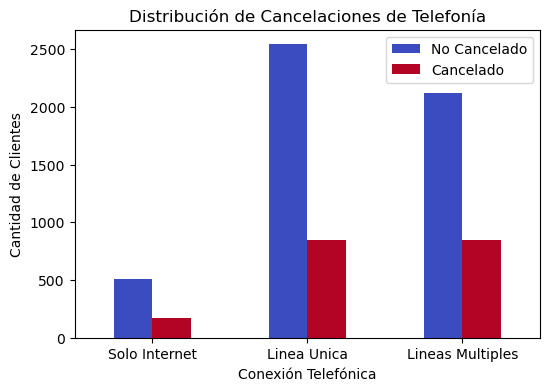

In [85]:
cancel_by_lines = contract_services.groupby(['multiple_lines', 'canceled'])['canceled'].size().unstack()
lineas = ['Solo Internet', 'Linea Unica', 'Lineas Multiples']
cancel_by_lines.plot(kind='bar', figsize=(6,4), colormap='coolwarm')
plt.title('Distribución de Cancelaciones de Telefonía')
plt.xlabel('Conexión Telefónica')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=range(len(cancel_by_lines.index)), labels=lineas, rotation=0)
plt.legend(['No Cancelado', 'Cancelado'])
plt.show()

En el gráfico, la cantidad de clientes con Single Line es mayor que los de Multiple Lines.

La cantidad de cancelaciones en ambas categorías parece similar en términos absolutos. Sin embargo, la tasa de cancelación (cancelados/contratados) parece mayor en múltiples líneas, ya que el total de clientes es menor que en línea única, pero las cancelaciones son casi las mismas.

En el gráfico también se observa la proporción de clientes que contratan únicamente internet y no el servicio telefónico, los cuales son menos de 1000. Sin embargo, la tasa de cancelación en este grupo es similar a la de aquellos que sí contratan líneas de telefonía fija.

La tasa de cancelación de la línea única representa casi un cuarto del total de contrataciones, mientras que la de múltiples líneas alcanza casi un tercio. 

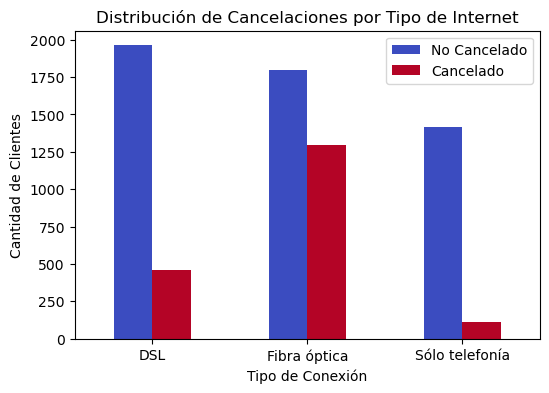

In [86]:
canceled_by_internet = contract_services.groupby(['internet_service', 'canceled'])['canceled'].size().unstack()
conexion_type = ['DSL','Fibra óptica', 'Sólo telefonía']
canceled_by_internet.plot(kind='bar', figsize=(6,4), colormap='coolwarm')
plt.title('Distribución de Cancelaciones por Tipo de Internet')
plt.xlabel('Tipo de Conexión')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks= range(len(conexion_type)), labels=conexion_type, rotation=0)
plt.legend(['No Cancelado', 'Cancelado'])
plt.show()

La tasa de cancelación del servicio de `Internet de fibra óptica` es considerablemente alta, alcanzando aproximadamente el 43% de los clientes que lo contratan. En contraste, el servicio de  `DSL` presenta una mayor retencion de clientes y una tasa de cancelación significativamente más baja, cercana al 25% del total de clientes que lo eligen.

Además, el gráfico muestra una tercera categoría correspondiente a los clientes que **no** contratan internet pero sí servicio de `telefonía fija`. La cantidad de clientes en esta categoría es aproximadamente tres veces mayor que la de aquellos que contratan solo internet. Su tasa de cancelación, tanto en términos relativos como absolutos, es la más baja de todas, con apenas un 10% de cancelaciones.

Es conveniente analizar en detalle la relación entre la tasa de cancelación y el tipo de servicio contratado, ya sea solo Internet, solo telefonía o ambos. Esto permitirá identificar patrones de cancelación según el tipo de contratación y proponer estrategias para mejorar la retención de clientes.

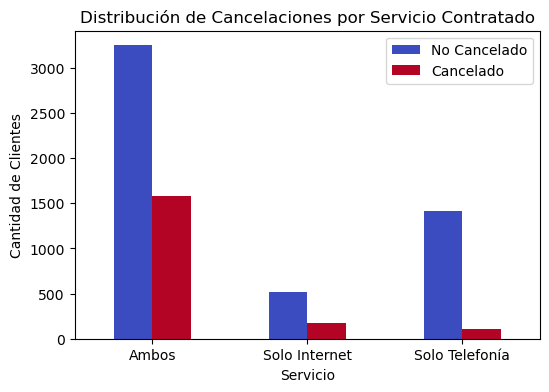

In [87]:
which_services=  contract_services.groupby(['service_category', 'canceled'])["canceled"].size().unstack()
which_services.plot(kind='bar', figsize=(6,4), colormap='coolwarm')
plt.title('Distribución de Cancelaciones por Servicio Contratado')
plt.xlabel('Servicio')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(['No Cancelado', 'Cancelado'])
plt.show()

Más de la mitad de los clientes (aproximadamente 4,900) contratan ambos servicios (telefonía e Internet). Aunque esta categoría es la más numerosa, su tasa de cancelación es relativamente alta, cercana al 31%. Como se observó en gráficos anteriores, la cantidad de clientes que contratan solo Internet es mucho menor, alrededor de 700, pero su tasa de cancelación sigue siendo elevada en proporción a las contrataciones. En contraste, el servicio de telefonía fija tiene la menor tasa de cancelación tanto en términos absolutos como relativos: aproximadamente 1,750 clientes lo contratan, y menos de 250 lo cancelan.

In [88]:
contract_personal = contract_df.merge(personal_df, how='outer', on='customer_id')
contract_personal.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,canceled,duration_months,gender,senior_citizen,partner,dependents
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,2.0,Female,No,Yes,No
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,35.0,Male,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,3.0,Male,No,No,No


#### Análisis de Cancelaciones según Características Personales del Cliente

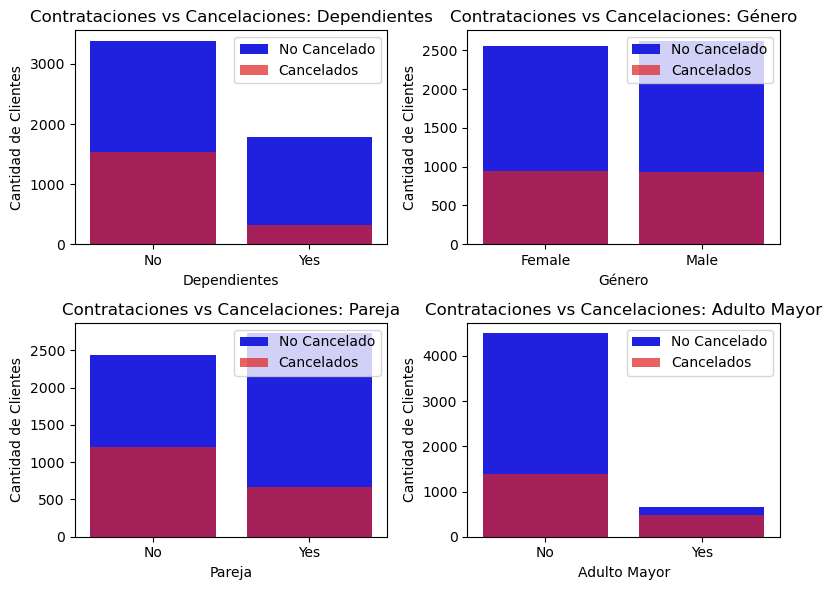

In [89]:
# Fusionar ambos DataFrames
contract_personal = contract_df.merge(personal_df, how='outer', on='customer_id')

# Seleccionar columnas de interés
personal_cols = ['dependents', 'gender', 'partner', 'senior_citizen']

personal_labels = {'dependents': 'Dependientes', 'gender': 'Género', 'partner': 'Pareja','senior_citizen': 'Adulto Mayor'
                   }

# Convertir a DataFrame plano para seaborn
df_long = contract_personal.melt(id_vars=['customer_id', 'canceled'], 
                                 value_vars=personal_cols, 
                                 var_name='personal_features', 
                                 value_name='status')

# Contar clientes que contrataron (canceled = 0) y que cancelaron (canceled = 1)
df_grouped = df_long.groupby(['personal_features', 'status', 'canceled']).size().reset_index(name='count')

# Separar en dos DataFrames: contrataciones y cancelaciones
df_no_canceled = df_grouped[df_grouped['canceled'] == 0]
df_canceled = df_grouped[df_grouped['canceled'] == 1]

# Graficar
plt.figure(figsize=(8, 6))

# Crear subplots para cada característica personal
for i, feature in enumerate(personal_cols, 1):
    plt.subplot(2, 2, i)
    
    # Filtrar datos para la característica actual
    no_canceled_feature = df_no_canceled[df_no_canceled['personal_features'] == feature]
    canceled_feature = df_canceled[df_canceled['personal_features'] == feature]
    
    # Combinar datos para graficar
    df_plot = pd.merge(no_canceled_feature, canceled_feature, 
                       on=['personal_features', 'status'], 
                       suffixes=('_contrataciones', '_cancelaciones'))
    
    # Graficar barras
    sns.barplot(data=df_plot, x='status', y='count_contrataciones', color='blue', label='No Cancelado')
    sns.barplot(data=df_plot, x='status', y='count_cancelaciones', color='red', label='Cancelados', alpha=0.7)
    
    # Personalizar el gráfico
    plt.title(f'Contrataciones vs Cancelaciones: {personal_labels[feature]}')
    plt.xlabel(personal_labels[feature])
    plt.ylabel('Cantidad de Clientes')
    plt.legend()

plt.tight_layout()
plt.show()

El análisis de los gráficos no muestra una relación evidente entre las características personales del cliente y la tasa de cancelación del servicio. Sin embargo, se pueden identificar algunas tendencias:

`Dependientes`: Hay una mayor cantidad de clientes sin dependientes en comparación con aquellos que sí los tienen. Además, la tasa de cancelación es más alta entre los clientes sin dependientes, mientras que los clientes con dependientes parecen cancelar el servicio con menor frecuencia.

`Género`: No se observa ninguna diferencia significativa en la tasa de cancelación entre hombres y mujeres. La cantidad de clientes en cada grupo es similar, y la proporción de cancelaciones es prácticamente la misma, lo que sugiere que el género no influye en la decisión de cancelar el servicio.

`Pareja`: Aunque la cantidad de clientes con y sin pareja es relativamente similar, los clientes sin pareja presentan una tasa de cancelación más alta. Esto indica que las personas en pareja podrían ser más propensas a mantener el servicio.

`Adulto Mayor`: La cantidad total de clientes adultos mayores es considerablemente menor en comparación con otros grupos. Sin embargo, su tasa de cancelación es más alta, lo que podría indicar que este segmento de clientes es más propenso a dar de baja el servicio.

En general, aunque no hay una relación clara entre las características personales y la cancelación del servicio, se observa que los clientes sin pareja, sin dependientes y los adultos mayores tienden a cancelar con mayor frecuencia.

In [90]:
df_full = contract_services.merge(personal_df, how='left', on='customer_id')
df_full.head(3)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,canceled,duration_months,...,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,service_category,gender,senior_citizen,partner,dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2.0,...,No,No,No,No,Internet Only,Solo Internet,Female,No,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,35.0,...,Yes,No,No,No,No,Ambos,Male,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,3.0,...,No,No,No,No,No,Ambos,Male,No,No,No


### Ingenieria de Caracteristicas
Antes de proceder con la construcción del modelo, se ha definido un plan para el tratamiento de las columnas del dataset con el objetivo de optimizar el proceso de entrenamiento y mejorar la calidad de las predicciones.

**1. Eliminación de Columnas Irrelevantes**

Se han identificado las siguientes columnas que no aportan información útil para el modelo:

- `customer_id`: Es un identificador único para cada cliente, pero no tiene un impacto directo en la predicción de cancelaciones.

- `begin_date` y `end_date`: Se utilizaron para calcular la duración de la suscripción en meses, pero al ya contar con la columna `duration_months`, estas fechas dejan de ser necesarias.

- `canceled`: Esta es la variable objetivo, por lo que debe separarse del conjunto de entrenamiento.

- `service_category`: Fue creada para facilitar el análisis gráfico de los tipos de servicio contratados, pero no aporta nueva información al modelo, ya que los datos subyacentes sobre los servicios están representados en otras columnas.

**2. Tratamiento de Columnas Categóricas**

- Las variables categóricas serán transformadas mediante **One-Hot Encoding (OHE)** para convertirlas en un formato adecuado para los algoritmos de machine learning.

- Se aplicará **OHE** a todas las columnas categóricas, generando variables binarias para cada categoría presente.

- Se utilizará la opción `drop_first=True` para evitar colinealidad, eliminando la primera categoría de cada variable.

**3. Mantenimiento de Columnas Numéricas**

Las siguientes columnas contienen valores numéricos relevantes y se mantendrán en el dataset sin modificaciones:

- `monthly_charges`: Representa el monto cobrado mensualmente al cliente.

- `total_charges`: Suma total pagada por el cliente durante su permanencia en la empresa.

- Dado que la antigüedad del cliente ha demostrado ser un factor relevante, la columna `duration_months` podría no ser lo suficientemente descriptiva por sí sola. Por ello, a partir de `begin_date`, se generarán dos nuevas columnas:

- `begin_year`: Año en que comenzó el contrato.
- `begin_month`: Mes en que comenzó el contrato.

Los modelos serán entrenados con y sin estas nuevas columnas para evaluar su impacto en el desempeño y determinar si deben conservarse.

**4. Evaluación de Otras Variables**

- Las columnas `paperless_billing` y `payment_method` serán mantenidas en una primera iteración del modelo para evaluar su impacto en la predicción. Posteriormente, se eliminarán para analizar si la precisión del modelo mejora sin ellas.

- Las columnas relacionadas con los servicios contratados (`device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines`) serán conservadas, ya que contienen información sobre las preferencias de los clientes y podrían ser relevantes para la predicción de cancelaciones.

- Las variables personales (`gender`, `senior_citizen`, `partner`, `dependents`) serán evaluadas en el modelo de la misma manera que `paperless_billing` y `payment_method`, para analizar su impacto y decidir si deben ser eliminadas en futuras iteraciones.

- Este enfoque permite garantizar que solo se utilicen las características más relevantes en la predicción de cancelaciones, minimizando el riesgo de incluir datos innecesarios y optimizando la capacidad del modelo para detectar patrones en el comportamiento de los clientes.

In [91]:
# Extraer año y mes
df_full['begin_year'] = df_full['begin_date'].dt.year
df_full['begin_month'] = df_full['begin_date'].dt.month

# Mostrar las primeras filas para verificar
print(df_full[['begin_date', 'begin_year', 'begin_month']].head(3))

  begin_date  begin_year  begin_month
0 2020-01-01        2020            1
1 2017-04-01        2017            4
2 2019-10-01        2019           10


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler 

# Eliminar columnas innecesarias
X = df_full.drop(['customer_id', 'begin_date', 'end_date', 'canceled', 'service_category', 'partner', 'paperless_billing'], axis=1)
y = df_full['canceled']

# Separar columnas numéricas y categóricas
num_cols = ['monthly_charges', 'total_charges', 'begin_year', 'begin_month' ]
cat_cols = [col for col in X.columns if col not in num_cols]

# Escalar Datos
X[num_cols] = MaxAbsScaler().fit_transform(X[num_cols])

# Aplicar OneHotEncoding solo a las categóricas
X_ohe = pd.get_dummies(X[cat_cols], drop_first=True)  # `drop_first=True` evita colinealidad

# Concatenar las columnas numéricas con las categóricas codificadas
X_final = pd.concat([X[num_cols].reset_index(drop=True), X_ohe.reset_index(drop=True)], axis=1)

# Dividir datos en entrenamiento + validación y prueba
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_final, y, test_size=0.2, random_state=123, stratify=y)

# Dividir entrenamiento + validación en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=123)

# Verificar el resultado
print(X_train.shape, X_valid.shape, X_test.shape)
X_final.head(3)

(4225, 23) (1409, 23) (1409, 23)


,monthly_charges,total_charges,begin_year,begin_month,duration_months,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_No,multiple_lines_Yes,gender_Male,senior_citizen_Yes,dependents_Yes
0,0.251368,0.003437,1.000000,0.083333,2.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0.479579,0.217564,0.998515,0.333333,35.0,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
2,0.453474,0.012453,0.999505,0.833333,3.0,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False


In [93]:
# Verificar el equilibrio de clases
y.value_counts()

canceled
0    5174
1    1869
Name: count, dtype: int64

Las clases están desbalanceadas, ya que hay más del doble de clientes con contrato vigente en comparación con los que han cancelado el servicio. Inicialmente, se evaluará la calidad de los modelos utilizando los datos sin aplicar técnicas de balanceo. Dependiendo de las métricas de desempeño obtenidas, se determinará si es necesario aplicar estrategias para equilibrar las clases y mejorar la predicción de la clase minoritaria.

### Entrenamiento de Modelos
#### Regresión Logistica

In [94]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
print(accuracy_score(y, y_pred_constant))

0.7346301292063041


In [95]:
# Definir índices y columnas
models = ['LogisticRegression', 'RandomForest', 'XGBoost']
metrics = ['F1_Score', 'AUC_ROC', 'Recall', 'Precision', 'Accuracy']
comparation_model_df = pd.DataFrame(index=models, columns=metrics)

In [96]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de Regresión Logística
lr_model = LogisticRegression(random_state=1234, solver='liblinear', class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predicciones y métricas
lr_predictions = lr_model.predict(X_valid)
lr_probabilities = lr_model.predict_proba(X_valid)[:, 1]

# Almacenar resultados en la tabla
comparation_model_df.loc['LogisticRegression'] = [
    f1_score(y_valid, lr_predictions),
    roc_auc_score(y_valid, lr_probabilities),
    recall_score(y_valid, lr_predictions),
    precision_score(y_valid, lr_predictions),
    accuracy_score(y_valid, lr_predictions)
]

# Mostrar resultados
print(comparation_model_df)


                    F1_Score   AUC_ROC    Recall Precision  Accuracy
LogisticRegression  0.634921  0.863663  0.854701  0.505051  0.755145
RandomForest             NaN       NaN       NaN       NaN       NaN
XGBoost                  NaN       NaN       NaN       NaN       NaN


#### Análisis del Modelo de Regresión Logística
El modelo de **Regresión Logística** obtuvo un ***F1-score*** de $0.635$ y una ***Exactitud*** de $0.755$, lo que indica que su desempeño no es significativamente mejor que una predicción al azar. Presenta un ***recall*** de $0.855$, superior a su ***precisión*** de $0.505$, lo que significa que identifica correctamente a la mayoría de los clientes que cancelaron su contrato, pero con baja precisión, clasificando erróneamente a varios clientes vigentes como cancelados.

El valor del ***Área Bajo la Curva ROC (AUC-ROC)*** es $0.863$, lo que indica que el modelo distingue relativamente bien entre las clases 0 y 1.

Se comparó el desempeño del modelo con y sin las nuevas columnas derivadas de `begin_date` (`begin_year` y `begin_month`). Los resultados iniciales del modelo sin estas características fueron ligeramente inferiores en la mayoría de las métricas, lo que sugiere que agregar información temporal puede aportar valor a la clasificación. Para confirmar esta hipótesis, se realizará la misma comparación con el modelo de **Bosque Aleatorio**.

Para mejorar la calidad del modelo, se aplicará **sobremuestreo** a la clase minoritaria con el fin de equilibrar las clases y evaluar si esto mejora su desempeño.

In [97]:
from sklearn.utils import shuffle
# Funcion de Submuestreo
def submuestreo(features, target, fraction):
    # Separa las caracteristicas y objetivos segun el objetivo (0 o 1)
    features_ceros = features[target == 0]
    features_unos = features[target == 1]
    target_ceros = target[target == 0]
    target_unos = target[target == 1]

    # Concatenamos todas las observaciones de la clase 1 con una muestra aleatoria de las observaciones de la clase 0, 
    # tomando una fracción (definida por la variable 'fraction') de los datos de la clase 0.
    features_submuestras = pd.concat([features_ceros.sample(frac=fraction, random_state=1234)]+[features_unos])
    
    # Realizamos la misma operacion anterior con los objetivos
    target_submuestras = pd.concat([target_ceros.sample(frac=fraction, random_state=1234)]+[target_unos])
    
    # mezclar las muestras para volver a tener aletoriedad en el conjunto
    features_submuestras, target_submuestras = shuffle(features_submuestras, target_submuestras, random_state=1234)
    
    return features_submuestras, target_submuestras
# Sobremuestreo
def upsample(features, target, repeat):
    # Separa las caracteristicas y objetivos segun el objetivo (0 o 1)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Concatenamos todas las observaciones de la clase 1 multiplicadas las veces que indique repeat
    # con una muestra aleatoria de las observaciones de la clase 0, 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # mezclar las muestras para volver a tener aletoriedad en el conjunto
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

X_upsampled, y_upsampled = upsample(
    X_train, y_train, 2)

X_subsampled, y_subsampled = submuestreo(
    X_train, y_train, 0.4)


##### Random Forest (Bosque Aleatorio) 

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=9,random_state= 1234, n_estimators=22, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_valid)[:,1]
rf_predictions = rf_model.predict(X_valid)
    
# Almacenar resultados en la tabla
comparation_model_df.loc['RandomForest'] = [
    f1_score(y_valid, rf_predictions),
    roc_auc_score(y_valid, rf_probabilities),
    recall_score(y_valid, rf_predictions),
    precision_score(y_valid, rf_predictions),
    accuracy_score(y_valid, rf_predictions)
]

# Mostrar resultados
print(comparation_model_df)

                    F1_Score   AUC_ROC    Recall Precision  Accuracy
LogisticRegression  0.634921  0.863663  0.854701  0.505051  0.755145
RandomForest        0.694377  0.902469  0.809117  0.608137  0.822569
XGBoost                  NaN       NaN       NaN       NaN       NaN


#### Conclusión del Modelo de Bosque Aleatorio
Tras evaluar el modelo de **Bosque Aleatorio**, se probaron distintas combinaciones de eliminación de variables. Se determinó que la mejor opción es eliminar `partner` y `paperless_billing`, ya que su eliminación mejoró el desempeño del modelo. En contraste, eliminar otras columnas como `gender`, `senior_citizen`, `dependents` y `payment_method` redujo su rendimiento.

Inicialmente, el modelo fue entrenado sin las columnas derivadas de `begin_date`, conservando únicamente `duration_months`. En esta versión, se obtuvo un ***F1-score*** de $0.662$, con un ***recall*** de $0.783$ y una ***precisión*** de $0.565$.

Sin embargo, al incluir las nuevas características begin_year y begin_month, el desempeño del modelo mejoró significativamente:

- F1-score aumentó de 0.662 a 0.694.
- Recall aumentó de 0.783 a 0.809.
- Precisión pasó de 0.565 a 0.608.
- AUC-ROC aumentó de 0.866 a 0.903.
- Exactirud pasó de 0.765 a 0.823.

Estos resultados sugieren que la información temporal del contrato aporta valor al modelo, permitiéndole distinguir mejor entre clientes que cancelan y los que permanecen.

Para asegurar la robustez del modelo, se evaluó con datos originales, **submuestreados** y **sobremuestreados**. El mejor desempeño se obtuvo con los datos originales. Se probaron distintas combinaciones de class balancing, pero en la mayoría de los casos, aplicar `class_weight='balanced'` junto con **submuestreo** o **sobremuestreo** redujo las métricas del modelo.

Dado el incremento en el rendimiento con las nuevas características, se concluye que incluir `begin_year` y `begin_month` es beneficioso para la predicción de cancelaciones.

#### XGBoost

In [99]:
import xgboost as xgb

# Train a model using the scikit-learn API
xgb_model = xgb.XGBClassifier(n_estimators=22, eta=0.33, max_depth=6, enable_categorical=True)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
xgb_probabilities = xgb_model.predict_proba(X_valid)[:,1]
xgb_predictions = xgb_model.predict(X_valid)
   
# Almacenar resultados en la tabla
comparation_model_df.loc['XGBoost'] = [
    f1_score(y_valid, xgb_predictions),
    roc_auc_score(y_valid, xgb_probabilities),
    recall_score(y_valid, xgb_predictions),
    precision_score(y_valid, xgb_predictions),
    accuracy_score(y_valid, xgb_predictions)
]

# Mostrar resultados
print(comparation_model_df)


                    F1_Score   AUC_ROC    Recall Precision  Accuracy
LogisticRegression  0.634921  0.863663  0.854701  0.505051  0.755145
RandomForest        0.694377  0.902469  0.809117  0.608137  0.822569
XGBoost             0.873635  0.972166  0.797721  0.965517  0.942512


El modelo **XGBoost** mostró un desempeño superior en comparación con los demás modelos en la mayoría de las métricas, destacándose con un ***F1-score*** de $0.874$, un ***AUC-ROC*** de $0.971$ y una ***Exactitud*** de $0.942$. Estos resultados indican que el modelo distingue eficazmente entre clases positivas y negativas, además de mantener un buen equilibrio entre ***recall*** y ***precisión***, lo que significa que es capaz de detectar más clientes que cancelarán su contrato sin incrementar significativamente los falsos positivos.

Debido a su sólido rendimiento, **XGBoost** ha sido seleccionado para predecir los clientes con mayor probabilidad de cancelar su contrato. No obstante, antes de su implementación final, se llevará a cabo una última evaluación utilizando el conjunto de prueba para validar su calidad.

In [100]:
predictions_test = xgb_model.predict(X_test)
test_score = f1_score(y_test, predictions_test)
probabilities_test = xgb_model.predict_proba(X_test)
probab_one_test = probabilities_test[:, 1]
test_auc_roc = roc_auc_score(y_test, probab_one_test)

print("El F1 :{:.4f}".format(test_score))
print('AUC_ROC:{:.4f}'.format(test_auc_roc))
print(f'Recall:{ recall_score(y_test, predictions_test):.4f}')
print("Precisión:{:.4f}".format(precision_score(y_test, predictions_test)))
print(f"Exactitud:{accuracy_score(y_test, predictions_test):.4f}")

El F1 :0.8333
AUC_ROC:0.9603
Recall:0.7353
Precisión:0.9615
Exactitud:0.9219


### Conclusion.
Muchos factores influyen en la decisión de un cliente al cancelar su contrato. Uno de los principales es la estacionalidad: el análisis muestra que todas las cancelaciones ocurrieron entre octubre y enero. Por ello, una estrategia efectiva podría ser ofrecer descuentos o bajar los precios en esos meses para reducir la tasa de cancelación.

En cuanto a los servicios contratados, la telefonía fija tiene la mayor tasa de retención de clientes, mientras que las conexiones a internet por fibra óptica presentan una mayor tasa de cancelación en comparación con DSL. Esto sugiere que sería útil investigar problemas técnicos o de servicio en las conexiones de fibra óptica para mejorar la experiencia del usuario.

No se encontró evidencia de que los servicios adicionales de internet estén generando problemas o contribuyendo directamente a las cancelaciones. Sin embargo, los servicios de streaming, tanto de TV como de películas, tienen la mayor tasa de cancelación entre los servicios adicionales. Esto indica que podrían mejorarse o implementarse estrategias para hacerlos más atractivos y aumentar su retención.

Otro hallazgo importante es que los clientes con contratos a largo plazo muestran una mayor retención. Por ello, podría ser beneficioso establecer contratos con una duración mínima de 3 a 4 meses, permitiendo que los usuarios se adapten al servicio y reporten problemas antes de considerar la cancelación inmediata tras un mes de uso.

En cuanto a la información personal de los clientes, uno de los factores con mayor impacto en la retención es el hecho de tener dependientes. Aunque la cantidad de clientes en esta categoría es menor, su tasa de cancelación también es más baja, tanto en términos absolutos como proporcionales. Esto sugiere que sería beneficioso diseñar ofertas o promociones dirigidas a este segmento, ya que tienden a permanecer más tiempo como clientes.

En lo que respecta al desempeño de los modelos de Machine Learning, la inclusión de las columnas begin_month y begin_year mejoró significativamente los resultados. Aunque el modelo de Regresión Logística mostró un rendimiento apenas superior a una predicción aleatoria, los modelos de Bosque Aleatorio y XGBoost obtuvieron un desempeño notablemente mejor. XGBoost se destacó como el más eficaz, manteniendo la calidad de sus métricas incluso en el conjunto de prueba.

Por último, los datos del conjunto no estaban equilibrados, y aunque se probaron métodos para balancearlos, las métricas del modelo no mejoraron significativamente, reduciéndose apenas unas milésimas. Además, se descartaron columnas consideradas innecesarias para evitar ruido en los datos y mejorar la calidad del análisis.

### Plan de trabajo

- [x] ¿Los clientes con contratos mensuales cancelan más que los anuales?
- [x] ¿El tipo de conexión a internet (DSL vs. fibra óptica) afecta la retención?
- [x] ¿Cuál es la tasa de cancelación mensual y qué factores internos podrían estar asociados a esa variación?
- [x] ¿Existe algun problema con alguno servicios que esté causando una mayor tasa de cancelacion?
- [x] ¿La situación personal del cliente (genero/pareja/dependientes/adulto mayor) influye en la cancelación?

**Cargar y analizar los datos:** 
- [x] Cargar los datasets y procesarlos para verificar que no haya errores en los datos como valores duplicados o ausentes.
- [x] Combinar los datasets y  análizarlos para encontrar la informacíon más relebante para el entrenamiento de los modelos.
- [x] Graficar informácion que pueda resultar relevante para la prediccion de clientes que abandonan el servicio.

**Ingenieria de caracteristicas**
- [x] Eliminar las columnas que resulten irrelebantes para el análisis.
- [x] Codificar los datos para el entrenamiento de los modelos.

**Entrenamiento de modelos ML.** 
- [x] Dividir los datos resultantes del analisis para el entrenamiento, validacion y prueba de los modelos.
- [x] Realizar prueba de cordura.
- [x] Entrenar 3 modelos diferentes y elegir el más eficaz.
- [x] Probar el modelo seleccionado con el conjunto de prueba.
